# Trabalho 1


## Otimização sem restrição
Um problema de otimização sem restrições diz respeito a obtenção do mínimo ou máximo local $x^*$ de uma função objetivo $f(x) ; f: \mathbb{R}^n \rightarrow \mathbb{R}$

$${min f(x)}_{x \in \mathbb{R}^n}$$

#### Vetor gradiente

O gradiente é um vetor que aponta na direção de maior crescimento de uma função. No contexto da otimização, ele é utilizado para encontrar a direção de menor crescimento da função objetivo, que é a direção oposta a do gradiente.

$$f_x=\frac{\partial f(x)}{\partial x} = \frac{\partial f(x) }{\partial x_1}, \frac{\partial f(x) }{\partial x_2}, \frac{\partial f(x)}{\partial x_m} $$

#### Matriz hessiana

Matriz que contêm informações sobre a curvatura da função objetivo. É usado para determinar se um ponto é um mínimo ou máximo local.

$$ (f_{xx})_{ij} = \frac{\partial^2 f(x)}{\partial x_i \partial x_j} $$

- $x^*$ é míninmo se $f_{xx} > 0$
- $x^*$ é máximo se $f_{xx} < 0$


#### Série de Taylor
É utilizada para aproximar funções complicadas por meio de funções polinomiais mais simples. É uma representação matemática de uma função como uma soma de inifinitos termos.

$$ T(f, a, x)=\sum_{n=0}^{\infty}\frac{f^n(a)}{n!}(x-a)n $$

- Expansão da série de Taylor em função do vetor gradiente  e da matriz Hessiana
$$ f(x) = f(x_0)= (\frac{\partial f}{\partial x})^T(x-x_0)+ \frac{1}{2}(x-x_0)^T(\frac{\partial^2f}{\partial x^2})(x-x_0)+O(3) $$



# Exemplo: Otimização sem restrições de uma superfície quarática

Para $x \in \mathbb{R}^2$, uma superfície quadrada é dada por:

  $$f(x) = \frac{1}{2}x^TQx + S^Tx $$

$x$ : Vetor de $n$ variáveis $x=[x_1, x_2, ..., x_n]$

$Q$ : Matriz simétrica $n \times n$ que define os termos quadráticos da superfície

$S$ : Vetor $n \times 1$ que define os termos lineares da superfície


Para minimizar a função, temos o ponto crítico:
$$f_{x} = Qx + S = 0 $$

E portanto, o ponto de controle ótimo:
$$x^* = -Q^{-1}S $$

Além disso, o Hessiano que determina o tipo do ponto crítico é
$$f_{xx} = Q$$

Indicando que $x^*$ é um ponto mínimo.

Para encontrar o valor extremo do índice de desempenho $f(x^*)$, substituimos o valor encontrado de $x^*$ na equação da superfície quadrática e obtemos:
$$f(x^*) = \frac{1}{2}(S^{T}.Q^{-1}).Q.(S.Q^{-1}) - S^{T}.(S.Q^{-1})$$

$$\Rightarrow f(x^*) = -\frac{1}{2}(S^{T}.Q^{-1})S$$

 Para

 $$Q = \begin{bmatrix}
 1 & 1 \\
 1 & 2
\end{bmatrix}  ;  S^T = \begin{bmatrix}0 & 1\end{bmatrix}$$

Temos
$$ x^* = -Q^{-1}S = -\begin{bmatrix} 2 & -1 \\ -1 & 1\end{bmatrix} \begin{bmatrix}0\\1 \end{bmatrix} = \begin{bmatrix}1\\-1\end{bmatrix} $$


 $$f(x^*) = -\frac{1}{2}\begin{bmatrix}0 & 1\end{bmatrix}\begin{bmatrix} 2 & -1 \\ -1 & 1\end{bmatrix}\begin{bmatrix}0\\1 \end{bmatrix} = -\frac{1}{2}$$



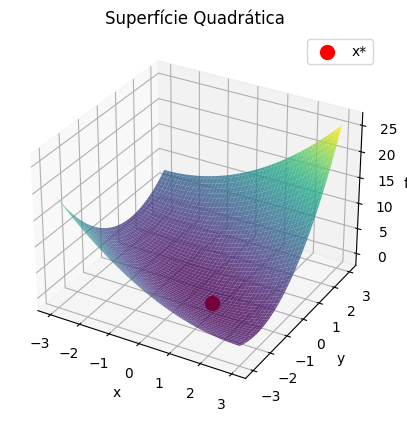

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Q = np.array([[1, 1],[1, 2]])
S = np.array([0, 1])

#    @brief: Retorna a função que define a superfície quadrática
def f(x):
    return (0.5 * np.dot(np.dot(x.T, Q), x) + np.dot(S, x))

#    @brief: Cria malha de pontos para plotar a superfície quadrática
#        - linspace(): retorna conjunto de números uniformemente espaçados
#        - meshgrid(): retorna matrizes de coordenadas a partir de vetores 1D
#        - zeros(): retorna um array do tamanho passado como pârametro
#        - x: vetor que representa as coordenadas x e y do ponto atual da malha
def GetQuadraticSurface():
    vecX = np.linspace(-3, 3, 100)
    vecY = np.linspace(-3, 3, 100)
    meshX, meshY = np.meshgrid(vecX, vecY)
    fValues = np.zeros(meshX.shape)
    for line in range(meshX.shape[0]):
        for column in range (meshX.shape[1]):
            x = np.array([meshX[line, column], meshY[line, column]])
            fValues[line, column] = f(x)
    PlotQuadraticSurface(meshX, meshY, fValues)

#    @brief:
#    - add_subplot(): Cria uma "subimagem" dentro da figura
#    - plot_surface(): plota uma superfície 3D na figura (cmap=paletaDeCores)
def PlotQuadraticSurface(meshX, meshY, fValues):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(meshX, meshY, fValues, cmap='viridis', alpha=0.8)
    GetOptimalX(ax)
    ConfGraph(ax)

#        @brief:
#        - linalg.solve(Q, -S): Resolve o sistema de equação linear Qx= -S
#        - scatter(): Plota o
def GetOptimalX(ax):
    optimalX = np.linalg.solve(Q, -S)
    ax.scatter(optimalX[0], optimalX[1], f(optimalX), color='red', s=100, label='x*')

def ConfGraph(ax):
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x)')
    ax.set_title('Superfície Quadrática')
    ax.legend()
    plt.show()

GetQuadraticSurface()


## Parte 01: Otimização analítica
- Encontrar Analiticamente $x^{*} \in \mathbb{R}^2$ que minimize $J(x) = (x - C)^{T} A(x-C) + b$ e $J(x^*)$

$x$ : Vetor de $n$ variáveis $x=[x_1, x_2, ..., x_n]$

$A$ : Matriz simétrica $n \times n$ que define os termos quadráticos da superfície

$C$ : Vetor $n \times 1$ que define os termos lineares da superfície

Primordialmente convém expandir a expressão $J(x)$. Partindo de $(AB)^T = B^TA^T$ obtemos:
$$J(x) = (x^T - C^T)A(x-C) + b = x^T(A(x-C)) - C^T(A(x-C)) + b$$  

Em seguida, é possível calcular o gradiente $\nabla J(x)$:
$$\frac{\partial}{\partial x} \left ( x^T(Ax- AC) \right )   = Ax$$

$$\frac{\partial}{\partial x}  \left (-C^T(Ax-AC) \right ) = -AC$$

$$\frac{\partial }{\partial x} b = 0 $$

$$\therefore J_{x} = A(x-C)$$

Para minimizar a função, encontramos o ponto crítico:
$$ A(x-C) = 0 \Rightarrow Ax = AC \therefore x^* = C$$

E o Hessiano:
$$J_{xx} = A$$









    
    